<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/Kopia_notatnika_Keras_rnn_syntax_plain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Generowanie danych

Na początek wygenerujmy przykładowe dane. Niech będzie to pomiar pewnej wartości. Dane powinny mieć format 1xTx1 gdzie T to ilośc próbek

(1, 300, 1)


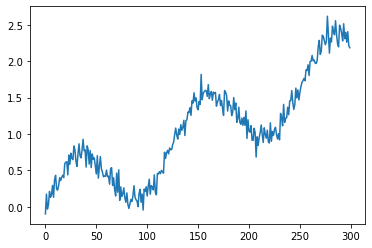

In [2]:
T = 300
time = np.linspace(0,10,T)
X = 0.2 * time + np.random.randn(T)*0.1  + 0.5 * np.sin(time*1.5)
X = np.expand_dims(X, 0)
X = np.expand_dims(X, -1)
print(X.shape)
plt.plot(X[0, :, 0])

## Tworzenie prostej sieci RNN (N:1)

In [3]:
rnn = layers.SimpleRNN(units=64)
output = rnn(X)
print(output.shape)

(1, 64)


## Zadanie: sprawdź wartośc min i max zwróconych wyników. Czy pasują do nieliniowości tanh?

In [4]:
np.min(output)

-0.8641523

In [5]:
np.max(output)

0.89851713

## Klasyfikacja całej sekwencji do jednej z 10 klas

In [6]:
model = keras.Sequential()
#proszę dodać warstwy:
# - warstwa SimpleRNN z liczbą neuronów 64 i odpowiednim kształtem wejścia
# - warstwa gęsta z 10 neuronami i najczęstszą funkcją aktywacji na ostatniej warstwie dla klasyfikacji
model.add(layers.SimpleRNN(64, input_shape=(None, 1)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
output = model(X)
print(output.shape)
print(output)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 4,874
Trainable params: 4,874
Non-trainable params: 0
_________________________________________________________________
(1, 10)
tf.Tensor(
[[0.06486892 0.02660451 0.03285592 0.01533211 0.13346297 0.02735698
  0.03390076 0.1829968  0.36438537 0.11823568]], shape=(1, 10), dtype=float32)


# Tworzenie warstwy RNN (N:N)




In [23]:
rnn = layers.SimpleRNN(units=64, return_sequences=True)
output = rnn(X)
output.shape

TensorShape([1, 300, 64])

## Wielowarstwowa sieć RNN

In [9]:
model = keras.Sequential()
#proszę dodać warstwy:
# - warstwa SimpleRNN z liczbą neuronów 64 i odpowiednim kształtem wejścia i informacją 
# aby przekazać w głąb sieci sekwencję
# - warstwa SimpleRNN z liczbą neuronów 64
model.add(layers.SimpleRNN(64, return_sequences=True, input_shape = (None, 1)))
model.add(layers.SimpleRNN(64))

model.summary()

output = model(X)
output.shape

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 64)          4224      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
Total params: 12,480
Trainable params: 12,480
Non-trainable params: 0
_________________________________________________________________


TensorShape([1, 64])

## Zadanie: Skąd wynikają liczby parametrów?

## Klasyfikacja wszystkich elementów sekwencji

In [10]:
model = keras.Sequential()

# zadeklarować warstwę SimpleRNN z liczbą neuronów 64 i odpowiednim kształtem wejścia i informacją 
# aby przekazać w głąb sieci sekwencję i odpowiednim kształtem wejścia
rnn1 = layers.SimpleRNN(64, return_sequences=True)

# zadeklarować warstwę SimpleRNN z liczbą neuronów 64 i odpowiednim kształtem wejścia i informacją 
# aby przekazać w głąb sieci sekwencję
rnn2 = layers.SimpleRNN(64, return_sequences=True)

#zadeklarować warstwę łączącą/agregującą sekwencję w sieć pełnych połączeń (coś jak flatten przy zdjęciach)
# i przekazać do warstwy gęstej z 10 neuronami i najczęstszą funkcją aktywacji 
# na ostatniej warstwie dla klasyfikacji (hint: TimeDistributed i Dense)
fc = layers.TimeDistributed(layers.Dense(10, activation='softmax'))

model.add(rnn1)
model.add(rnn2)
model.add(fc)
model.build(input_shape=(None, None, 1))
model.summary()

output = model(X)
output.shape

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 64)          4224      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 time_distributed (TimeDistr  (None, None, 10)         650       
 ibuted)                                                         
                                                                 
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


TensorShape([1, 300, 10])